In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
from tqdm.notebook import tqdm
import pandas as pd

# Load the dataset
file_path = 'parkinsons.csv'
df = pd.read_csv(file_path)

# Define the sampling strategies
oversampling_strategies = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

undersampling_strategies = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(),
    'EditedNearestNeighbours': EditedNearestNeighbours()
}

combination_strategies = {
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Function to apply sampling
def apply_sampling(strategy, X, y):
    X_resampled, y_resampled = strategy.fit_resample(X, y)
    return X_resampled, y_resampled, Counter(y_resampled)

# Select features and target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Apply oversampling strategies
oversampled_data = {}
for name, strategy in tqdm(oversampling_strategies.items(), desc='Oversampling'):
    oversampled_data[name] = apply_sampling(strategy, X, y)

# Apply undersampling strategies
undersampled_data = {}
for name, strategy in tqdm(undersampling_strategies.items(), desc='Undersampling'):
    undersampled_data[name] = apply_sampling(strategy, X, y)

# Apply combination strategies
combined_data = {}
for name, strategy in tqdm(combination_strategies.items(), desc='Combining Over- and Undersampling'):
    combined_data[name] = apply_sampling(strategy, X, y)

# Output the class distribution after sampling
print('Class distribution after oversampling:')
for name, data in oversampled_data.items():
    print(f'{name}: {data[2]}')

print('\nClass distribution after undersampling:')
for name, data in undersampled_data.items():
    print(f'{name}: {data[2]}')

print('\nClass distribution after combination of over- and undersampling:')
for name, data in combined_data.items():
    print(f'{name}: {data[2]}')

Oversampling:   0%|          | 0/3 [00:00<?, ?it/s]

Undersampling:   0%|          | 0/3 [00:00<?, ?it/s]

Combining Over- and Undersampling:   0%|          | 0/2 [00:00<?, ?it/s]

Class distribution after oversampling:
RandomOverSampler: Counter({1: 147, 0: 147})
SMOTE: Counter({1: 147, 0: 147})
ADASYN: Counter({1: 147, 0: 146})

Class distribution after undersampling:
RandomUnderSampler: Counter({0: 48, 1: 48})
NearMiss: Counter({0: 48, 1: 48})
EditedNearestNeighbours: Counter({1: 111, 0: 48})

Class distribution after combination of over- and undersampling:
SMOTEENN: Counter({0: 118, 1: 104})
SMOTETomek: Counter({1: 145, 0: 145})


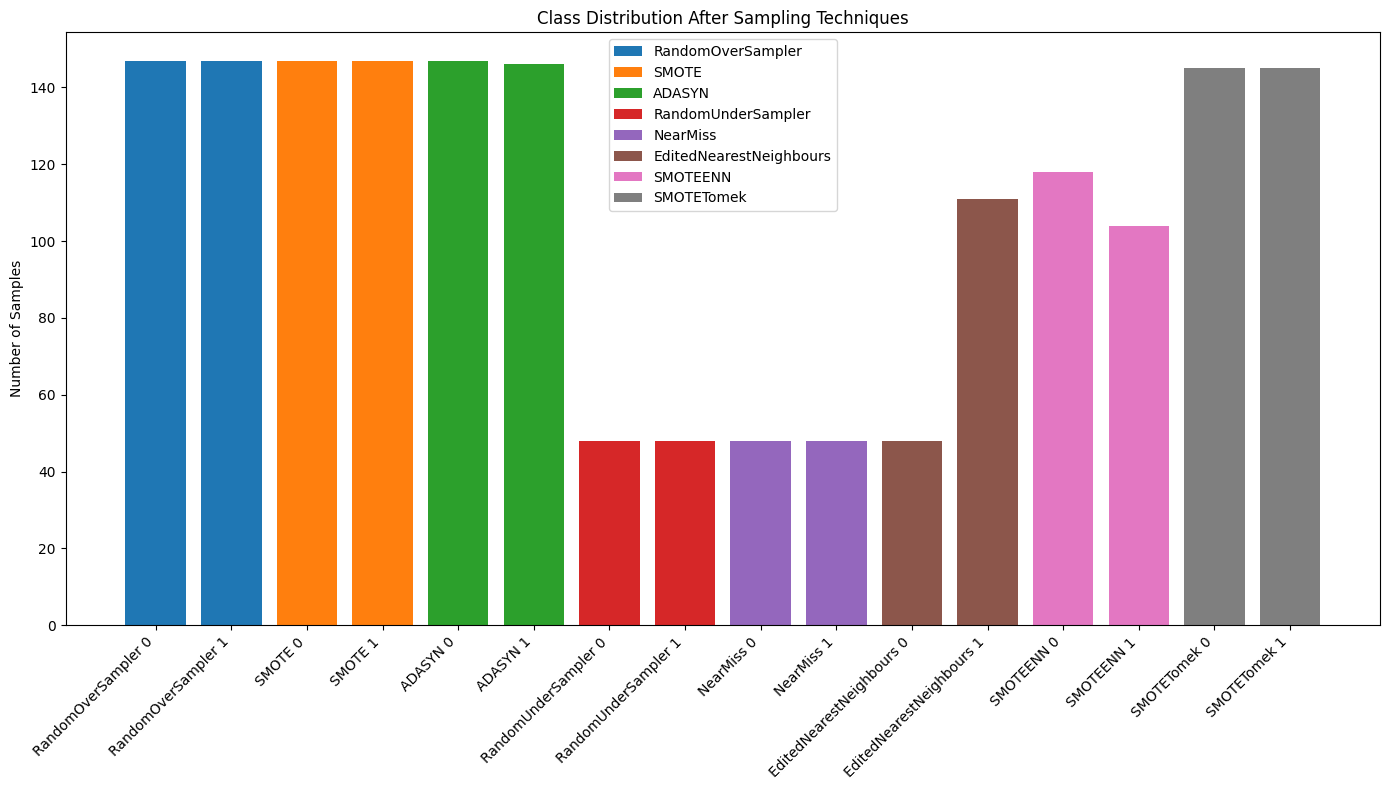

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for bar graph
strategy_names = ['RandomOverSampler', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'NearMiss', 'EditedNearestNeighbours', 'SMOTEENN', 'SMOTETomek']
class_distributions = [
    oversampled_data['RandomOverSampler'][2],
    oversampled_data['SMOTE'][2],
    oversampled_data['ADASYN'][2],
    undersampled_data['RandomUnderSampler'][2],
    undersampled_data['NearMiss'][2],
    undersampled_data['EditedNearestNeighbours'][2],
    combined_data['SMOTEENN'][2],
    combined_data['SMOTETomek'][2]
]

# Plot bar graph
plt.figure(figsize=(14, 8))
for i, (name, distribution) in enumerate(zip(strategy_names, class_distributions)):
    plt.bar(x=[name + ' 0', name + ' 1'], height=distribution.values(), label=name)

plt.title('Class Distribution After Sampling Techniques')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()